In [1]:
# 1. Create a fantasy landscape image using a text-to-image model
!pip install -U "diffusers[torch]" transformers accelerate safetensors

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

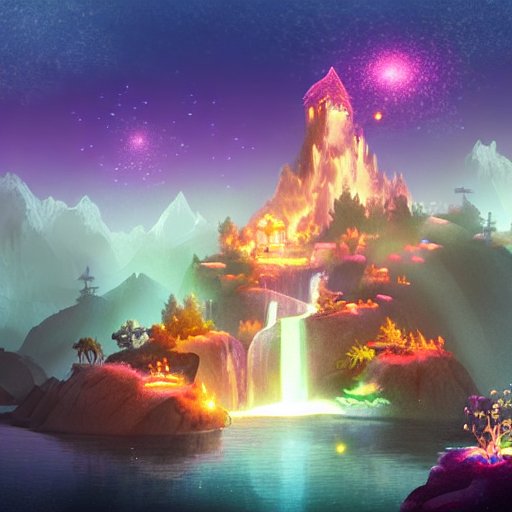

In [1]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display
pipe = StableDiffusionPipeline.from_pretrained(
  "runwayml/stable-diffusion-v1-5",
  torch_dtype=torch.float16
).to("cuda")
# Prompt
prompt = "A magical fantasy landscape with glowing waterfalls and floating islands"
# Generate
result = pipe(prompt)
image = result.images[0]
# Show
display(image)
# Save
image.save("fantasy.png")

  0%|          | 0/50 [00:00<?, ?it/s]

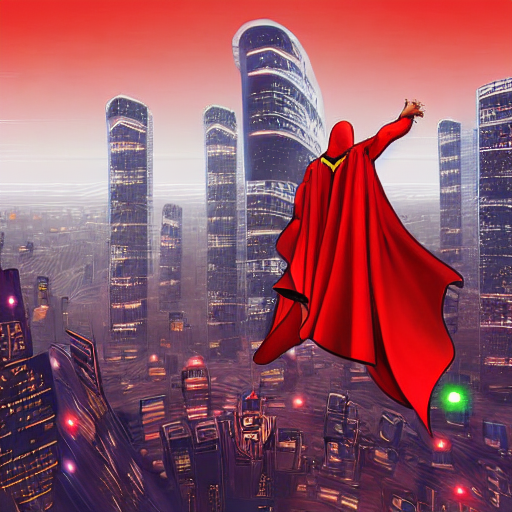

In [2]:
# 2. Generate an AI-made cartoon superhero character.

prompt = "A cartoon superhero with a red cape, flying over a futuristic city, digital art style"
image = pipe(prompt, guidance_scale=7.5).images[0]
# Show inline in Colab
display(image)
# Save to file if you want
image.save("superhero.png")

  0%|          | 0/50 [00:00<?, ?it/s]

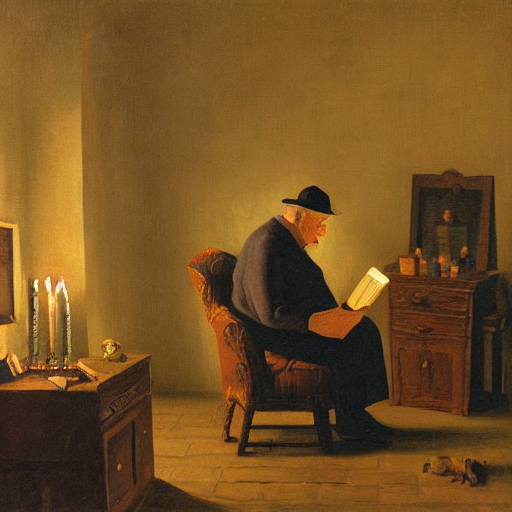

In [3]:
# 3. Generate an oil painting style portrait from a text prompt.

prompt = "An oil painting of a wise old man reading a book under candlelight"
image = pipe(prompt, guidance_scale=7.5).images[0]
# Show inline in Colab
display(image)
# Save to file if you want
image.save("superhero.png")

  0%|          | 0/50 [00:00<?, ?it/s]

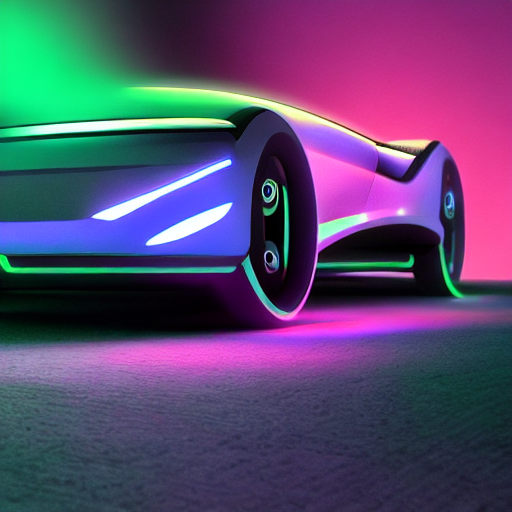

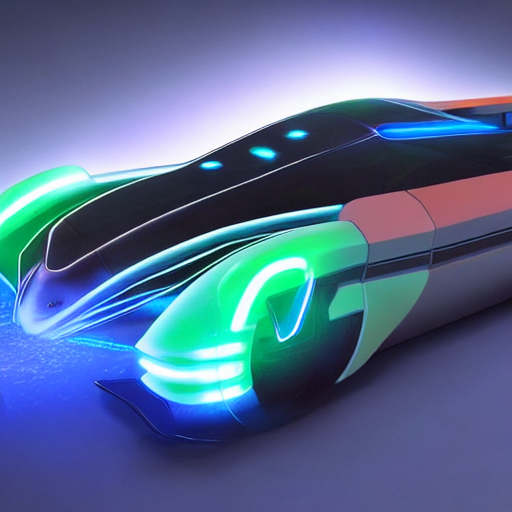

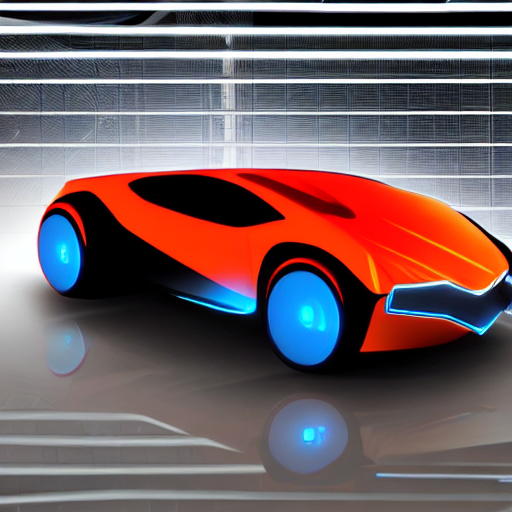

In [5]:
# 4. Generate multiple variations of a futuristic car design.

prompt = "A futuristic electric car with neon lights, concept art"
result = pipe(prompt, num_images_per_prompt=3, guidance_scale=7.5)
images = result.images
# Show images inline
for i, img in enumerate(images):
  display(img) # show in Colab output
  img.save(f"car_design_{i}.png") # also save as files